# Bootcamp Sesión 2 
### Retornos| Correlación | Transformadas de Fourier
Septiembre 2024


In [51]:
import requests 
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
load_dotenv()
%matplotlib inline

API_KEY = os.environ['FMP']

In [52]:
def get_fx_data(ticker, period, starting, ending, API_KEY):
    # Crear la URL dinámica con los parámetros de entrada
    url = f'https://financialmodelingprep.com/api/v3/historical-chart/{period}/{ticker}?from={starting}&to={ending}&apikey={API_KEY}'
    
    # Hacer la solicitud GET a la API
    response = requests.get(url)
    
    # Comprobar si la respuesta fue exitosa (status code 200)
    if response.status_code == 200:
        # Convertir la respuesta a formato JSON
        data = response.json()
        df = pd.DataFrame(data)
        df = df.assign(ticker = f'{ticker}')
        return df
    else:
        # Si hubo un error, devolver el código de error
        print(f"Error: {response.status_code}")
        return None

In [53]:
df = get_fx_data('USDMXN', '4hour', '2022-09-01', '2024-09-22', API_KEY)

In [54]:
df.head()

,date,open,low,high,close,volume,ticker
0,2024-09-22 20:00:00,19.37580,19.36710,19.39710,19.37880,5053,USDMXN
1,2024-09-20 16:00:00,19.39980,19.38560,19.43060,19.41000,20720,USDMXN
2,2024-09-20 12:00:00,19.32850,19.32590,19.43632,19.39980,86153,USDMXN
3,2024-09-20 08:00:00,19.38918,19.25960,19.40250,19.32850,84628,USDMXN
4,2024-09-20 04:00:00,19.41627,19.31443,19.48770,19.38918,45308,USDMXN


#### Tema 1: Retornos y Distribuciones

<Axes: ylabel='Frequency'>

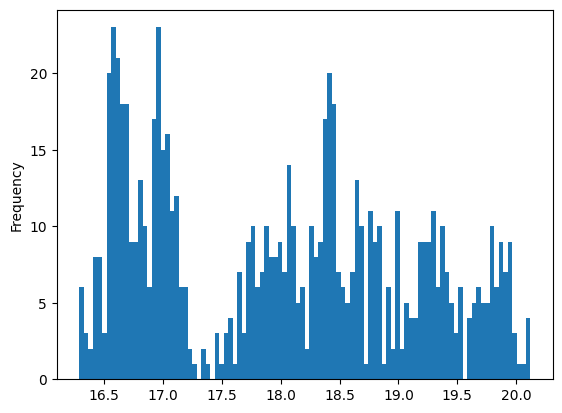

In [55]:
df['close'].plot(kind='hist', bins=100)

In [56]:
df['close'].pct_change()

0           NaN
1      0.001610
2     -0.000526
3     -0.003675
4      0.003139
         ...   
763    0.001003
764   -0.000097
765   -0.001860
766    0.005012
767    0.002477
Name: close, Length: 768, dtype: float64

<Axes: ylabel='Frequency'>

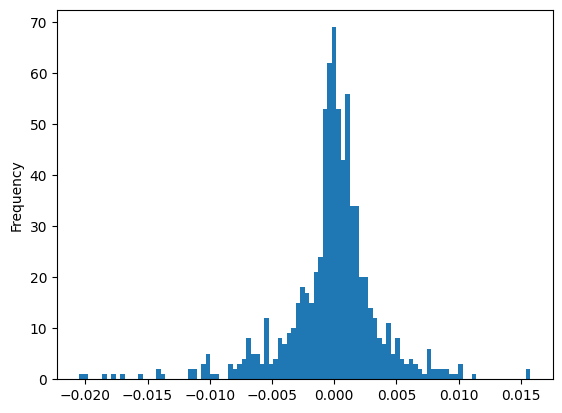

In [57]:
df['close'].pct_change().plot(kind='hist', bins=100)

En el análisis de series temporales financieras, como los precios de activos, los retornos y los retornos logarítmicos son dos métricas fundamentales para evaluar cambios porcentuales y patrones de rendimiento a lo largo del tiempo.

1. Retornos Simples (Porcentuales)
Los retornos simples miden el cambio porcentual en el precio de un activo de un periodo al siguiente.

3. Retornos Logarítmicos
Los retornos logarítmicos miden el cambio en los precios de manera más continua y son muy utilizados en modelos financieros porque tienen mejores propiedades estadísticas, como la aditividad sobre el tiempo.


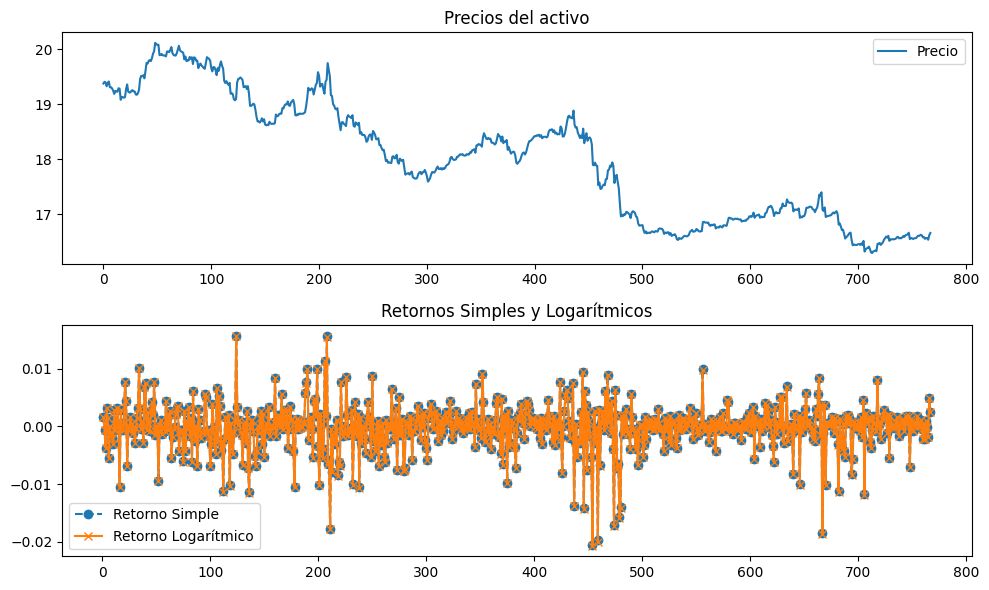

In [58]:
# Simulación de un conjunto de precios

df['Simple Return'] = df['close'].pct_change()

# Calcular los retornos logarítmicos
df['Log Return'] = np.log(df['close'] / df['close'].shift(1))

# Graficar los precios
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(df['close'], label='Precio')
plt.title('Precios del activo')
plt.legend()

# Graficar los retornos simples y logarítmicos
plt.subplot(2,1,2)
plt.plot(df['Simple Return'], label='Retorno Simple', linestyle='--', marker='o')
plt.plot(df['Log Return'], label='Retorno Logarítmico', linestyle='-', marker='x')
plt.title('Retornos Simples y Logarítmicos')
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
# Retorno logarítmico acumulado desde el inicio hasta el final
total_log_return = np.log(df['close'].iloc[-1] / df['close'].iloc[0])
print(f"Retorno logarítmico acumulado: {total_log_return}")

# Suma de los retornos logarítmicos individuales
sum_log_returns = df['Log Return'].sum(skipna=True)
print(f"Suma de los retornos logarítmicos: {sum_log_returns}")

# Verificar si son iguales
print(f"¿Son iguales?: {np.isclose(total_log_return, sum_log_returns)}")

Retorno logarítmico acumulado: -0.15137255039989211
Suma de los retornos logarítmicos: -0.15137255039989211
¿Son iguales?: True


In [61]:
# Calcular retornos simples
df['Simple Return'] = df['close'].pct_change()

# Retorno simple acumulado
total_simple_return = (df['close'].iloc[-1] / df['close'].iloc[0]) - 1
print(f"Retorno simple acumulado: {total_simple_return}")

# Suma de los retornos simples individuales
sum_simple_returns = df['Simple Return'].sum(skipna=True)
print(f"Suma de los retornos simples: {sum_simple_returns}")

# Verificar si son iguales
print(f"¿Son iguales?: {np.isclose(total_simple_return, sum_simple_returns)}")

Retorno simple acumulado: -0.1404725782814208
Suma de los retornos simples: -0.14565580910316256
¿Son iguales?: False


#### Tema 2: Correlación y Sincronicidad 

La correlación de Pearson móvil es una técnica que permite calcular la correlación de Pearson entre dos series temporales dentro de una ventana deslizante (rolling window). Esto es útil cuando queremos observar cómo cambia la relación entre dos variables a lo largo del tiempo, ya que la correlación entre dos series puede no ser constante en todo el período de observación.

La correlación de Pearson mide la relación lineal entre dos variables

La correlación móvil calcula el coeficiente de correlación dentro de una ventana deslizante de tamaño fijo. La ventana se mueve a través de la serie temporal, y para cada posición de la ventana se calcula la correlación de Pearson.


In [31]:
df1 = get_fx_data('USDMXN', '4hour', '2022-09-01', '2024-09-22', API_KEY)
df2 = get_fx_data('ARSMXN', '4hour', '2022-09-01', '2024-09-22', API_KEY)

In [32]:
matriz = pd.concat([df1['close'],df2['close']], axis=1)

In [34]:
corr_mat =  matriz.corr()

In [35]:
corr_mat

,close,close
close,1.000000,0.105879
close,0.105879,1.000000


In [44]:
# Simulación de dos series temporales
np.random.seed(42)
n = 500
t = np.linspace(0, 10, n)

# Dos series con cierto nivel de correlación pero con ruido
series1 = np.sin(t) + np.random.normal(0, 0.5, n)
series2 = np.sin(t + 1) + np.random.normal(0, 0.5, n)

# Crear un DataFrame
df = pd.DataFrame({'Series1': series1, 'Series2': series2})

In [45]:
# Definir el tamaño de la ventana
window_size = 50

# Calcular la correlación móvil usando el método rolling y corr
rolling_corr = df['Series1'].rolling(window=window_size).corr(df['Series2'])

# Mostrar los primeros valores de la correlación móvil
print(rolling_corr.head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64


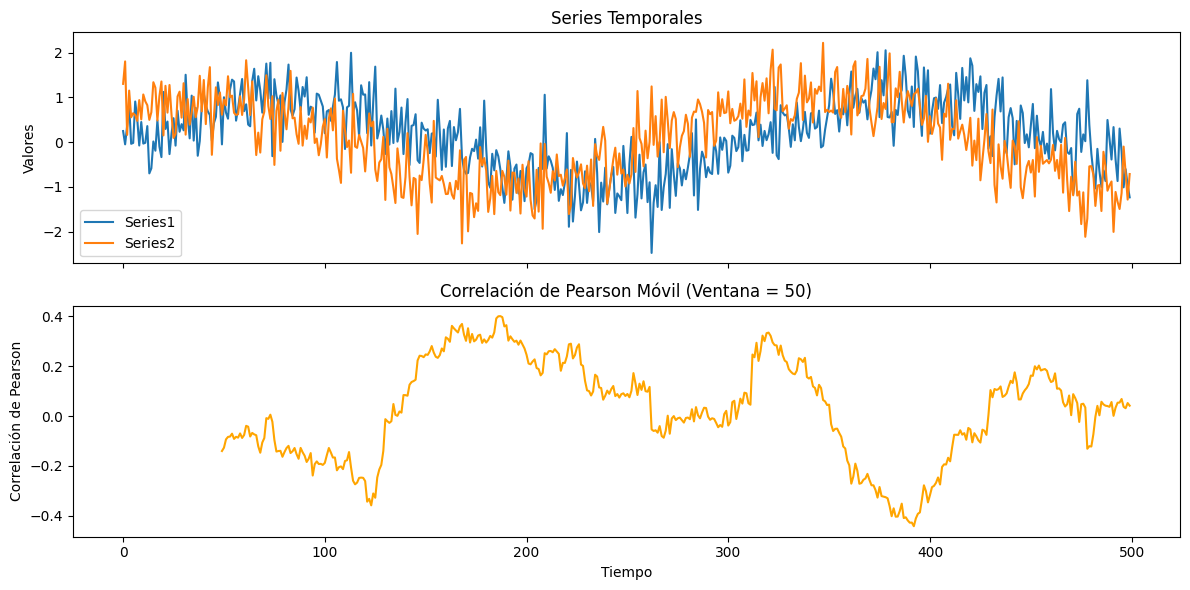

In [46]:
# Crear la figura y los subplots
f, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Graficar las dos series temporales
df.plot(ax=ax[0])
ax[0].set_title('Series Temporales')
ax[0].set_ylabel('Valores')

# Graficar la correlación móvil
rolling_corr.plot(ax=ax[1], color='orange')
ax[1].set_title(f'Correlación de Pearson Móvil (Ventana = {window_size})')
ax[1].set_xlabel('Tiempo')
ax[1].set_ylabel('Correlación de Pearson')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Time Lagged Cross Correlation (TLCC) es una técnica utilizada para medir la relación de correlación entre dos señales o series temporales cuando una de ellas puede estar "desfasada" en el tiempo. En otras palabras, se busca evaluar cómo una señal puede estar influenciada por otra con un cierto desfase temporal. Esto es útil para identificar relaciones de "líder-seguidor" donde un evento en la primera serie precede un comportamiento similar en la segunda.

En TLCC, al ajustar el desfase (lag), podemos ver si una serie está correlacionada con otra con algún retraso temporal. Si una señal "lidera" a otra, la correlación debería ser máxima en un determinado desfase.

Pasos:
- Calculamos la correlación cruzada entre dos señales.
- Introducimos un desfase temporal positivo y negativo para observar cómo varía la correlación cuando una señal se desplaza respecto a la otra.
- Identificamos el desfase donde la correlación es máxima, lo que podría indicar que una señal precede a la otra.

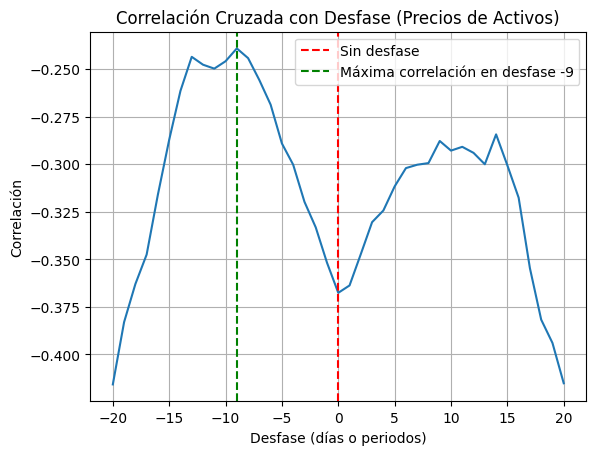

El desfase que maximiza la correlación es: -9 periodos


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Función para calcular la correlación cruzada con desfase
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

# Simulación de precios de dos activos financieros
np.random.seed(42)
n = 100
time = np.arange(n)
df = pd.DataFrame({
    'Precio_Activo_1': np.cumsum(np.random.normal(0, 1, n)) + 100,  # Serie de precios simulada
    'Precio_Activo_2': np.cumsum(np.random.normal(0, 1, n)) + 100   # Otra serie de precios simulada
})

# Definir las series de precios
precio1 = df['Precio_Activo_1']
precio2 = df['Precio_Activo_2']

# Rango de desfases (lags)
max_lag = 20  # Rango máximo de desfase a evaluar (en días o periodos)

# Calcular la correlación cruzada para un rango de desfases
correlaciones = [crosscorr(precio1, precio2, lag) for lag in range(-max_lag, max_lag + 1)]

# Encontrar el desfase que maximiza la correlación
offset = np.floor(len(correlaciones)/2) - np.argmax(correlaciones)

# Graficar los resultados
plt.plot(range(-max_lag, max_lag + 1), correlaciones)
plt.axvline(x=0, color='r', linestyle='--', label="Sin desfase")
plt.axvline(x=-offset, color='g', linestyle='--', label=f"Máxima correlación en desfase {-int(offset)}")
plt.title('Correlación Cruzada con Desfase (Precios de Activos)')
plt.xlabel('Desfase (días o periodos)')
plt.ylabel('Correlación')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir el lag que maximiza la correlación
print(f"El desfase que maximiza la correlación es: {-int(offset)} periodos")


Si el desfase (lag) que maximiza la correlación cruzada entre las dos series de precios es de -9 periodos, significa que la segunda serie de precios (por ejemplo, Precio_Activo_2) está correlacionada de forma más fuerte con la primera serie de precios (Precio_Activo_1) cuando la primera serie está desplazada 9 periodos hacia adelante en el tiempo.

En otras palabras:

La serie Precio_Activo_1 (la señal líder) está influenciando a la serie Precio_Activo_2 (la señal seguidora) con un retraso de 9 periodos.
Un desfase de -9 periodos indica que los movimientos en Precio_Activo_1 preceden a movimientos similares en Precio_Activo_2 con un retraso de 9 periodos (por ejemplo, 9 días si los datos son diarios).
En términos simples: los cambios que suceden en Precio_Activo_1 hoy podrían predecir, en cierto grado, cambios similares en Precio_Activo_2 dentro de 9 periodos.

#### Transformada de Fourier
La Transformada de Fourier (FT) es una herramienta matemática utilizada para descomponer una señal en sus componentes de frecuencia. En términos más simples, nos permite tomar una señal compleja (como el precio de una acción en el tiempo) y descomponerla en una serie de ondas sinusoidales de diferentes frecuencias. Esto es muy útil en diversas áreas, incluidas las finanzas, para analizar patrones cíclicos o tendencias en los precios.

¿Qué hace la Transformada de Fourier?
En el contexto de las finanzas, el precio de un activo a lo largo del tiempo puede considerarse como una serie temporal. Esta serie temporal es una mezcla de componentes con diferentes frecuencias:

Tendencias a largo plazo: Son componentes de frecuencia baja (ciclos largos) que representan movimientos más lentos y persistentes, como una tendencia alcista o bajista sostenida durante meses o años.
Movimientos de corto plazo: Son componentes de frecuencia alta (ciclos cortos) que representan fluctuaciones rápidas, como la volatilidad intradía o semanal.
La Transformada de Fourier descompone la serie temporal de precios en estas frecuencias para identificar patrones que pueden no ser obvios a simple vista.

Aplicación en Finanzas
Detección de ciclos o estacionalidades:

Las series de precios pueden mostrar patrones cíclicos que representan el comportamiento del mercado en diferentes momentos. Por ejemplo, puede haber ciclos que reflejen estacionalidad (patrones que ocurren en ciertos momentos del año) o patrones que ocurren después de ciertos eventos económicos.
La Transformada de Fourier te permite descomponer la serie de precios y ver qué ciclos o patrones periódicos están presentes en los datos. Esto es útil, por ejemplo, en el análisis de commodities o activos que tienen un componente estacional fuerte, como el petróleo o los productos agrícolas.

Filtrado de ruido:

Las series temporales de precios a menudo contienen mucho ruido (fluctuaciones de muy alta frecuencia que no aportan mucha información útil). Al realizar una transformada de Fourier, puedes identificar estas frecuencias de ruido y filtrarlas para centrarte en las señales más relevantes, es decir, las que representan movimientos significativos en el precio.
Análisis de volatilidad:

Al descomponer la serie de precios, es posible observar patrones de volatilidad cíclica. Algunas frecuencias de los precios pueden ser más volátiles que otras, lo que puede ser útil para identificar periodos de riesgo o estabilidad en el mercado.

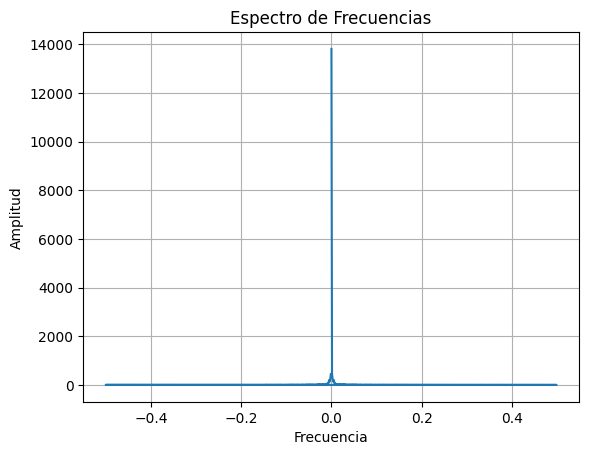

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo: precios de una acción
prices = [100, 102, 101, 103, 105, 107, 106, 108, 110, 112, 111, 113, 115]

# Crear un DataFrame con los precios
df = df1.rename(columns={'close':'Price'})

# Aplicar la Transformada de Fourier
fft = np.fft.fft(df['Price'])

# Obtener las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(fft))

# Graficar el espectro de frecuencias
plt.plot(frequencies, np.abs(fft))
plt.title('Espectro de Frecuencias')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

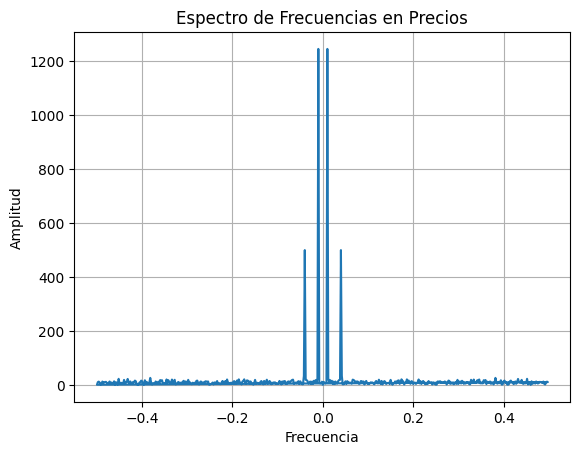

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Simulación de una serie de precios con patrones de tendencia y ruido
np.random.seed(42)
t = np.linspace(0, 1, 500)
precio = 5 * np.sin(2 * np.pi * 5 * t) + 2 * np.sin(2 * np.pi * 20 * t) + np.random.normal(0, 0.5, 500)

# Aplicar la Transformada de Fourier
fft = np.fft.fft(precio)
frecuencias = np.fft.fftfreq(len(fft))

# Graficar el espectro de frecuencias
plt.plot(frecuencias, np.abs(fft))
plt.title('Espectro de Frecuencias en Precios')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

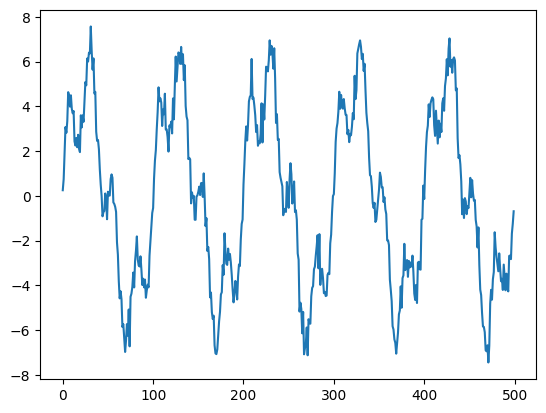

In [41]:
plt.plot(precio)


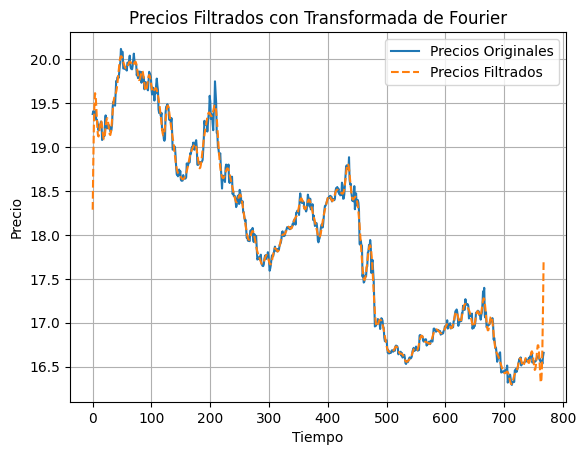

In [38]:
# Aplicar un filtro de paso bajo (por ejemplo, eliminar frecuencias altas)
fft_filtered = fft.copy()
fft_filtered[np.abs(frequencies) > 0.1] = 0  # Filtrar las frecuencias mayores a 0.1

# Transformada Inversa de Fourier para volver al dominio del tiempo
filtered_prices = np.fft.ifft(fft_filtered)

# Graficar los precios originales y los precios filtrados
plt.plot(df['Price'], label='Precios Originales')
plt.plot(filtered_prices.real, label='Precios Filtrados', linestyle='--')
plt.title('Precios Filtrados con Transformada de Fourier')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

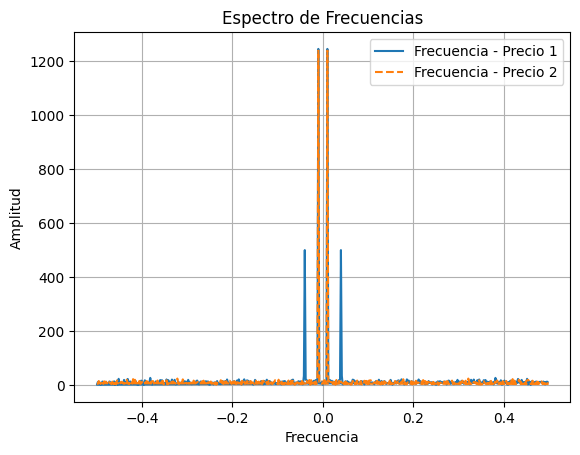

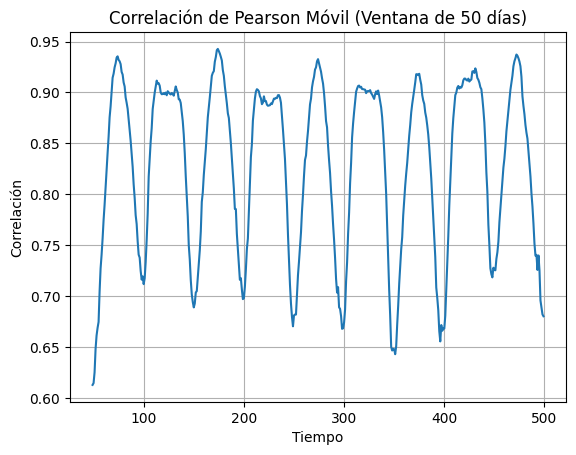

In [43]:
# Generar datos de ejemplo: dos series de precios
np.random.seed(42)
t = np.linspace(0, 1, 500)
price1 = 5 * np.sin(2 * np.pi * 5 * t) + 2 * np.sin(2 * np.pi * 20 * t) + np.random.normal(0, 0.5, 500)
price2 = 5 * np.sin(2 * np.pi * 5 * t) + np.random.normal(0, 0.5, 500)

# Convertir las series a un DataFrame
df = pd.DataFrame({'price1': price1, 'price2': price2})

# Aplicar la Transformada de Fourier a ambas series
fft_price1 = np.fft.fft(df['price1'])
fft_price2 = np.fft.fft(df['price2'])

# Calcular las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(fft_price1))

# Graficar el espectro de frecuencias para ambas series
plt.plot(frequencies, np.abs(fft_price1), label='Frecuencia - Precio 1')
plt.plot(frequencies, np.abs(fft_price2), label='Frecuencia - Precio 2', linestyle='--')
plt.title('Espectro de Frecuencias')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Calcular la correlación de Pearson móvil
window_size = 50  # Definir el tamaño de la ventana deslizante
rolling_corr = df['price1'].rolling(window=window_size).corr(df['price2'])

# Graficar la correlación móvil
plt.plot(rolling_corr)
plt.title(f'Correlación de Pearson Móvil (Ventana de {window_size} días)')
plt.xlabel('Tiempo')
plt.ylabel('Correlación')
plt.grid(True)
plt.show()